# **UNIT 1 FINAL PROJECT**

## **Group 7**

#### *Names*: Afeni Laws, Evie Davalbhakta, Rommy Sierra, Nathan Jackson, and Marybeth Yonk

### Leaky Integrate and Fire Neuron Model

The leaky-integrate and fire model is represented below. The key features of this model are the inclusion of current input, membrane resistance, membrane capacitance, voltage threshold, and resting membrane potential. The main function of this model is to illustrate a graded potential in a neuron. The membrane resistance variable accounts for the "leaky" aspect of the neuron model and a biological neuron. The model works by summing the input weights over a period of time and then elicits a graded potential before returning to resting potential. The integrative functions seen in the model are the mechanism by which the input summing/analysis occurs before giving an output. Overall, the model is the simplest (of the ones described in this project) representation of the firing pattern of a biological neuron. Because of its simplicity, it is used a lot in computational neuroscience, for it contains few hidden layers and bits of information relative to its more complex derivatives.

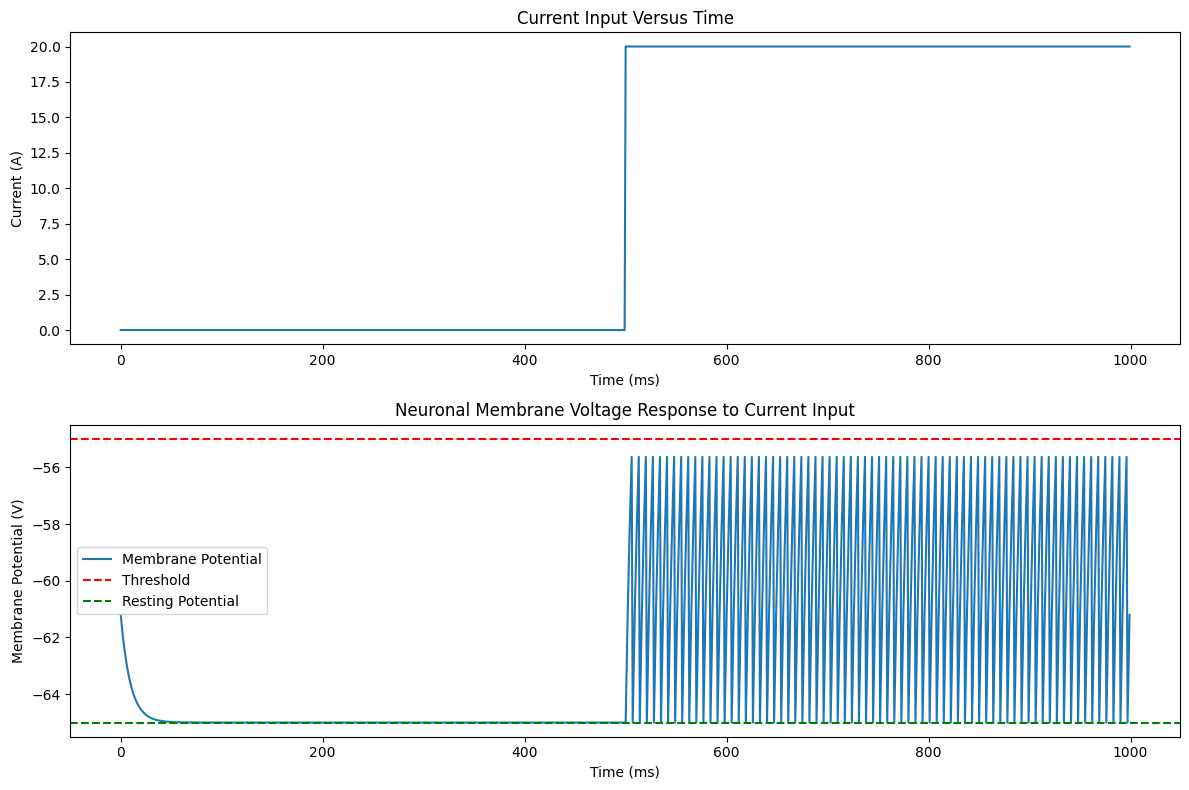

In [3]:
#This section of code is where the libraries "numpy" and "matplotlib" are imported in order for the code to have the proper resources to set up numerical operations and plot the spike data
import numpy as np
import matplotlib.pyplot as plt

#This section of the code is used to create a function that can be used to describe a LIF simulation
def lif_neuron(I, R=1, C=1, V_rest=-65, V_thresh=-55, V_reset=-65, dt=0.1, timesteps=1000):

    #This section of code is where all of the parameters are defined conceptually
    """
    Simulate a Leaky Integrate and Fire (LIF) neuron.

    Parameters:
    - I: Input current (constant or array)
    - R: Membrane resistance
    - C: Membrane capacitance
    - V_rest: Resting membrane potential
    - V_thresh: Threshold potential for firing
    - V_reset: Reset potential after firing
    - dt: Time step for numerical integration
    - timesteps: Number of simulation time steps

    Returns:
    - V: Membrane potential over time
    - spikes: Spike times
    """

    #This area of the code is necessary to set the initial variables of membrane potential and the times the spikes occur
    V = np.zeros(timesteps)
    spikes = []

    #This is a loop that goes through each point in time to determine the behavior of the neuron
    for t in range(-2, timesteps):
        #This is function that calculates the change in membrane potential according to the leaky integrate and fire model
        dV = (I[t - 1] - (V[t - 1] - V_rest) / R) / C * dt
        #This function is continuously updates the membrane potential at each point in time on the graph
        V[t] = V[t - 1] + dV

        #This is an "if" statement that sees if the calculated membrane voltage at the assessed time step is equivalent to the threshold. If it is, a spike is induced. If not, there is no spike.
        if V[t] >= V_thresh:
            V[t] = V_reset
            spikes.append(t)

    #This is where the spike times and the membrane potential for each point in time are returned
    return V, spikes

# This code is creating the input current and the change of current at 500 ms and says that the input current for the first 500 time steps is 0 and then 20A for the rest
I_step = np.concatenate([np.zeros(500), np.ones(500) * 20])

# This is calling the original LIF model function defined initially in the scope of the current input defined above
V_step, spikes_step = lif_neuron(I_step)

# All of the code below is relevant to plotting the data above
plt.figure(figsize=(12, 8))

#This is plot 1 relating to the input current plot
plt.subplot(2, 1, 1)
plt.plot(I_step, label='Input Current')
plt.title('Current Input Versus Time')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')

#This is plot 2 relating to the actual spike simulation of the neuron. Lines for threshold and resting potential were added to show how the input current affects the firing of the neuron through change in membrane voltage
plt.subplot(2, 1, 2)
plt.plot(V_step, label='Membrane Potential')
plt.axhline(y=-55, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-65, color='g', linestyle='--', label='Resting Potential')
plt.title('Neuronal Membrane Voltage Response to Current Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (V)')

#This is for the legend
plt.legend()
plt.tight_layout()
plt.show()

### Leaky Integrate and Fire Neuron Model with Voltage-Gated Sodium Channels

The leaky-integrate and fire neuron model with voltage-gated sodium channels is depicted below. This model is very similar to the original leaky-integrate and fire model but has an added layer of complexity. This complexity originates from the addition of voltage-gated sodium channels to the model through the use of the Hodgkin-Huxley equations. The increase in complexity indicates an increase in the number of hidden layers and bits in this model relative to the simplified leaky-integrate and fire model described above. The addition of voltage-gated sodium channels provides a more realistic visualization of the behavior of actual biological neurons described previously. It will allow for refractory periods, threshold behavior of action potentials, and all-or-nothing responses to be evident in the visualization.

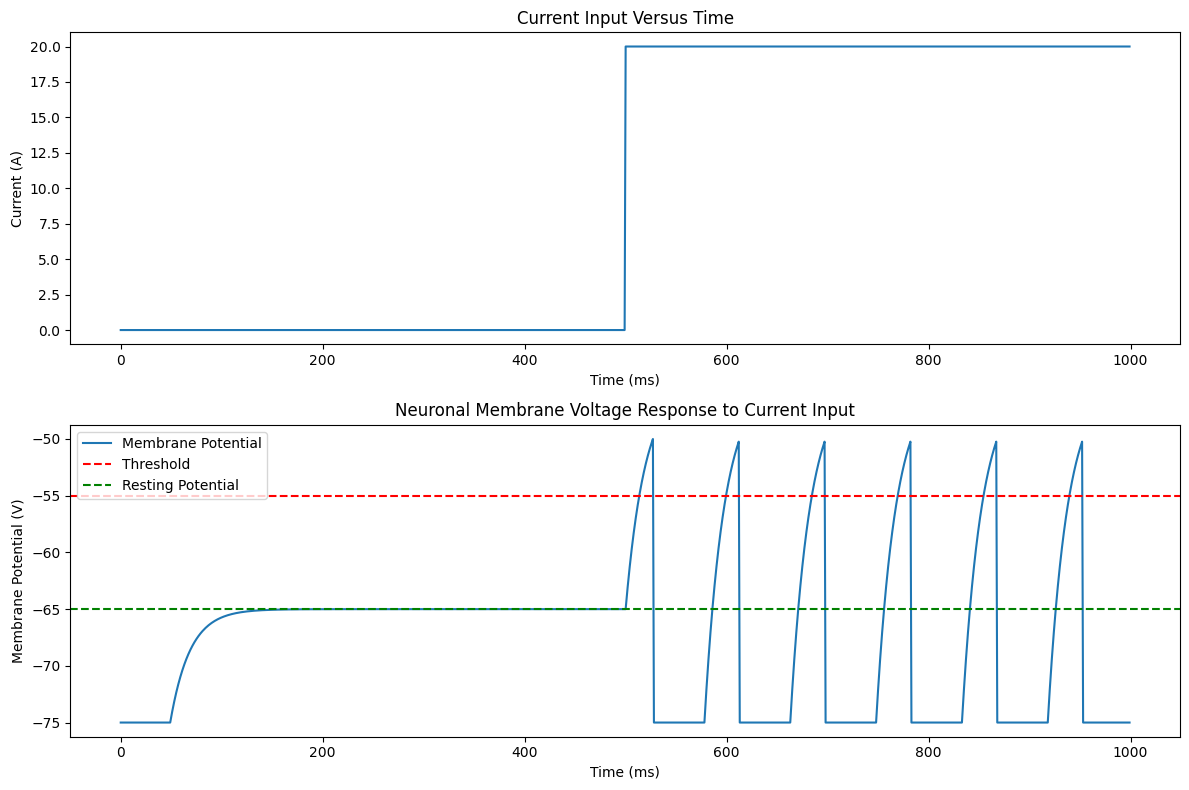

In [2]:
#This section of code is where the libraries "numpy" and "matplotlib" are imported in order for the code to have the proper resources to set up numerical operations and plot the spike data
import numpy as np
import matplotlib.pyplot as plt

#This section of the code is used to create a function that can be used to describe a LIF simulation
def lif_neuron_with_refractory(I, R=1, C=1, V_rest=-70, V_thresh=-55, V_reset=-80, refractory_period=50, dt=0.05, timesteps=1000, g_Na=1, E_Na=50, m_inf=-0.036, tau_m=1):
    V = np.zeros(timesteps)
    spikes = []
    m = np.zeros(timesteps)
    refractory_countdown = 0

    #This section of code is where all of the parameters are defined conceptually
    """
    Simulate a Leaky Integrate and Fire (LIF) neuron.

    Parameters:
    - I: Input current (constant or array)
    - R: Membrane resistance
    - C: Membrane capacitance
    - V_rest: Resting membrane potential
    - V_thresh: Threshold potential for firing
    - V_reset: Reset potential after firing
    - dt: Time step for numerical integration
    - timesteps: Number of simulation time steps

    Returns:
    - V: Membrane potential over time
    - spikes: Spike times
    """

    #This area of the code is necessary to set the initial variables of membrane potential and the times the spikes occur
    for t in range(-1, timesteps):
        # This is to check and affirm if the neuron is in the refractory period or not
        if refractory_countdown > 0:
            V[t] = V_reset
            refractory_countdown -= 1
            continue

        # Update sodium channel activation using a simple first-order kinetics (variable m represents sodium channel activation)
        dm = (m_inf - m[t - 1]) / tau_m * dt
        m[t] = m[t - 1] + dm

        # Calculating sodium current based on Hodgkin-Huxley model equations
        I_Na = g_Na * m[t]**3 * (V[t - 1] - E_Na)

        # Revise the membrane potential using LIF dynamics equations (from previous code)
        dV = (I[t - 1] - I_Na - (V[t - 1] - V_rest) / R) / C * dt
        V[t] = V[t - 1] + dV

        # This is an "if" statement that sees if the calculated membrane voltage at the assessed time step is equivalent to the threshold. If it is, a spike is induced. If not, there is no spike.
        if V[t] >= V_thresh:
            V[t] = V_reset
            spikes.append(t)
            refractory_countdown = refractory_period

    # This is where the spike times and the membrane potential for each point in time are returned
    return V+5, spikes

# This code is creating the input current and the change of current at 500 ms and says that the input current for the first 500 time steps is 0 and then 20A for the rest
I_step = np.concatenate([np.zeros(500), np.ones(500) * 20])

# This is calling the original LIF model function defined initially in the scope of the current input defined above
V_step, spikes_step = lif_neuron_with_refractory(I_step)

# All of the code below is relevant to plotting the data above
plt.figure(figsize=(12, 8))

# This is plot 1 relating to the input current plot
plt.subplot(2, 1, 1)
plt.plot(I_step, label='Input Current')
plt.title('Current Input Versus Time')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')

# This is plot 2 relating to the actual spike simulation of the neuron. Lines for threshold and resting potential were added to show how the input current affects the firing of the neuron through change in membrane voltage
plt.subplot(2, 1, 2)
plt.plot(V_step, label='Membrane Potential')
plt.axhline(y=-55, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-65, color='g', linestyle='--', label='Resting Potential')
plt.title('Neuronal Membrane Voltage Response to Current Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (V)')

# This is for the legend
plt.legend()
plt.tight_layout()
plt.show()

### Simple Neural Network: Feed-Forward

The code below shows the output of a simple open-loop neuron model. This model is more similar to the leaky-integrate and fire model in complexity. The inputs are assigned random weights and summed to produce an output as seen in the raster plots below. This model uses inputs to create a binary spike train and is dependent on the input number. There is no feedback being given in this neural model, so it has a simple linear activation function, which indicates limited complexity in the model and emphasizes its function as a building block for more complex systems.

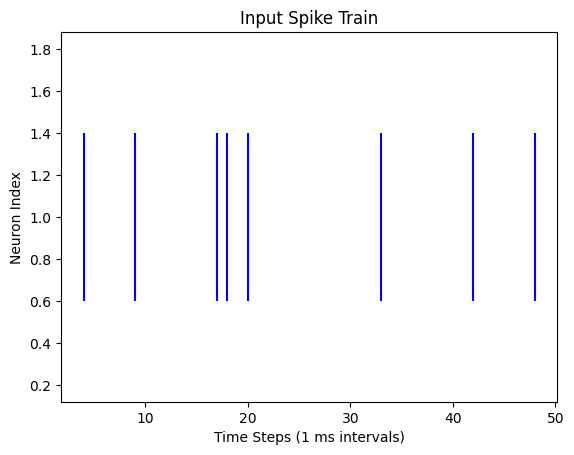

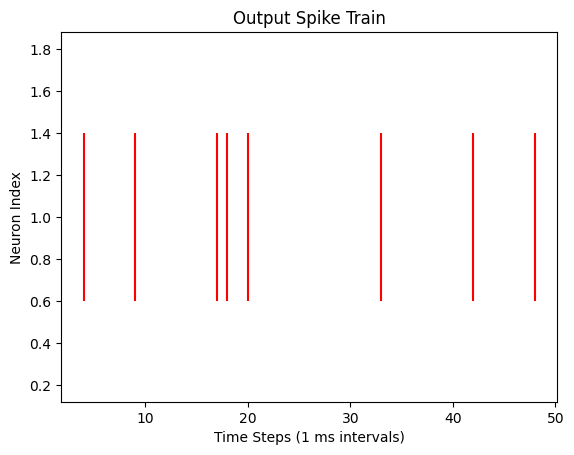

In [1]:
import random
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + 2.71828**(-x))

def generate_binary_spike_train(num_steps, firing_rate):
    spike_train = [random.random() < firing_rate for _ in range(num_steps)]
    return [int(spike) for spike in spike_train]

def simulate_neuron(inputs, weights, threshold):
    activation = sigmoid(sum(input_val * weight for input_val, weight in zip(inputs, weights)))
    return int(activation >= threshold)

def raster_plot(spike_train, title, color='black'):
    num_steps = len(spike_train)
    spike_indices = [i for i, spike in enumerate(spike_train) if spike]
    plt.eventplot([spike_indices], colors=color, linelengths=0.8)
    plt.title(title)
    plt.xlabel('Time Steps (1 ms intervals)')
    plt.ylabel('Neuron Index')
    plt.show()

# Define neural network parameters
input_size = 4
output_size = 1
threshold = 0.65

# Generate random weights for the neural network
input_weights = [random.random() for _ in range(input_size)]
output_weights = [random.random() for _ in range(output_size)]

# Generate input spike train
input_spike_train = generate_binary_spike_train(num_steps=50, firing_rate=0.2)

# Initialize output spike train
output_spike_train = [0] * 50

# Simulate the neural network
for step in range(50):
    inputs = [input_spike_train[step]]
    output_spike_train[step] = simulate_neuron(inputs, output_weights, threshold)

# Generate raster plots for input and output spikes
raster_plot(input_spike_train, 'Input Spike Train', color='blue')
raster_plot(output_spike_train, 'Output Spike Train', color='red')

### Model Comparison/Evaluation

#### The models used in this project were the LIF model, simple feedforward-model, and the LIF model with voltage gated sodium channels. Comparatively, the LIF and simple feedforward models are less complex than the LIF model with voltage-gated sodium channels. The LIF model and the LIF model with sodium gated channels better represent the activity of a real biological neuron through the incorporation of action potential and hyperpolarization whereas the simple feedforward models are more related to simple linear models that are the building blocks to more complex neural circuits. These simpler models are most similar to the perceptron that we learned at the beginning of Unit 1 with weighted  inputs, hidden layers, and summed inputs returned as outputs. The LIF model generates graded potential when signals surpass the threshold whereas the voltage-gated channel allows for the membrane dynamics to be depicted with greater complexity because voltage-gated sodium channels play an important role in spike generation. Feedforward and LIF models are useful for understanding basic input and output data through layers of weighted connections. The LIF voltage-gated sodium channel model is good for representing what is going on biologically and is considered more complex due to the greater degree of computation going on in the model (integration and Hodgkin-Huxley equations). The simple LIF model and simple feedforward model contain fewer bits than the LIF voltage-gated sodium channel models and are more concise. Fewer bits correlate to less complexity because these two models operate on a linear activation function.

### Simple Neural Network: Changing Inputs

##### *The code below shows the feed-forward neural model output given a larger input value. The larger degree of input resulted in more output spikes in the model.

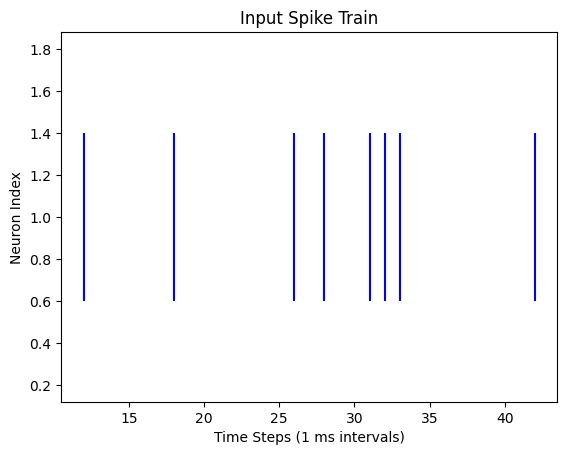

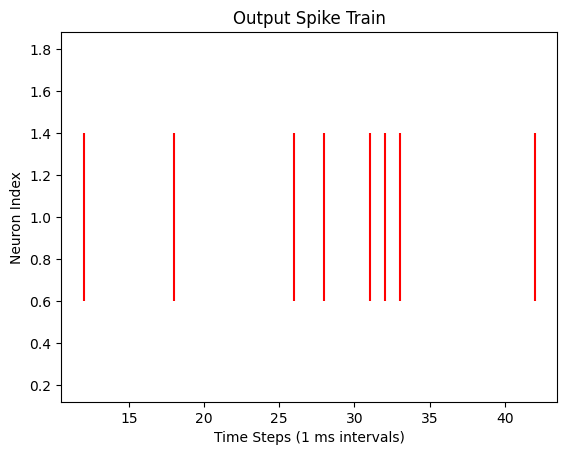

In [10]:
import random
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + 2.71828**(-x))

def generate_binary_spike_train(num_steps, firing_rate):
    spike_train = [random.random() < firing_rate for _ in range(num_steps)]
    return [int(spike) for spike in spike_train]

def simulate_neuron(inputs, weights, threshold):
    activation = sigmoid(sum(input_val * weight for input_val, weight in zip(inputs, weights)))
    return int(activation >= threshold)

def raster_plot(spike_train, title, color='black'):
    num_steps = len(spike_train)
    spike_indices = [i for i, spike in enumerate(spike_train) if spike]
    plt.eventplot([spike_indices], colors=color, linelengths=0.8)
    plt.title(title)
    plt.xlabel('Time Steps (1 ms intervals)')
    plt.ylabel('Neuron Index')
    plt.show()

# Define neural network parameters with increased input size
input_size = 5
output_size = 1
threshold = 0.65

# Generate random weights for the neural network
input_weights = [random.random() for _ in range(input_size)]
output_weights = [random.random() for _ in range(output_size)]

# Generate input spike train
input_spike_train = generate_binary_spike_train(num_steps=50, firing_rate=0.2)

# Initialize output spike train
output_spike_train = [0] * 50

# Simulate the neural network
for step in range(50):
    inputs = [input_spike_train[step]]
    output_spike_train[step] = simulate_neuron(inputs, output_weights, threshold)

# Generate raster plots for input and output spikes
raster_plot(input_spike_train, 'Input Spike Train', color='blue')
raster_plot(output_spike_train, 'Output Spike Train', color='red')

##### *The code below shows the feed-forward neural model output given a smaller input value. The smaller input value resulted in the inability of the model to produce spike outputs. This is probably due to the lack of threshold being reached because the input size is too little.

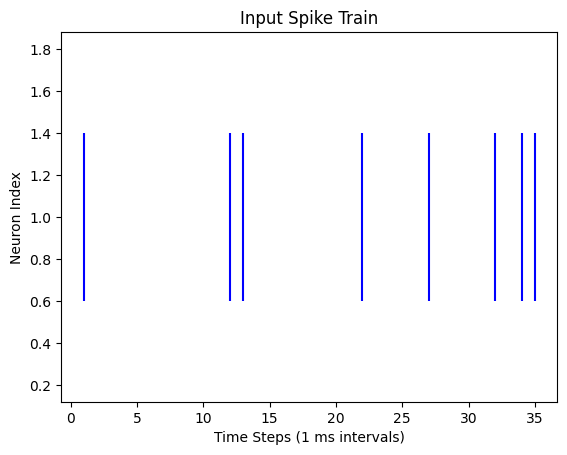

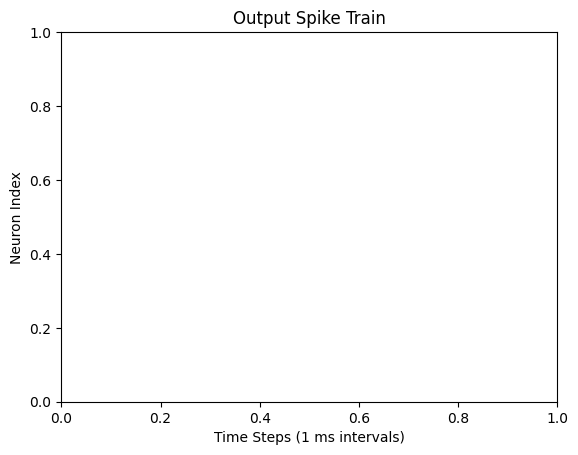

In [12]:
import random
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + 2.71828**(-x))

def generate_binary_spike_train(num_steps, firing_rate):
    spike_train = [random.random() < firing_rate for _ in range(num_steps)]
    return [int(spike) for spike in spike_train]

def simulate_neuron(inputs, weights, threshold):
    activation = sigmoid(sum(input_val * weight for input_val, weight in zip(inputs, weights)))
    return int(activation >= threshold)

def raster_plot(spike_train, title, color='black'):
    num_steps = len(spike_train)
    spike_indices = [i for i, spike in enumerate(spike_train) if spike]
    plt.eventplot([spike_indices], colors=color, linelengths=0.8)
    plt.title(title)
    plt.xlabel('Time Steps (1 ms intervals)')
    plt.ylabel('Neuron Index')
    plt.show()

# Define neural network parameters with decreased inout size
input_size = 2
output_size = 1
threshold = 0.65

# Generate random weights for the neural network
input_weights = [random.random() for _ in range(input_size)]
output_weights = [random.random() for _ in range(output_size)]

# Generate input spike train
input_spike_train = generate_binary_spike_train(num_steps=50, firing_rate=0.2)

# Initialize output spike train
output_spike_train = [0] * 50

# Simulate the neural network
for step in range(50):
    inputs = [input_spike_train[step]]
    output_spike_train[step] = simulate_neuron(inputs, output_weights, threshold)

# Generate raster plots for input and output spikes
raster_plot(input_spike_train, 'Input Spike Train', color='blue')
raster_plot(output_spike_train, 'Output Spike Train', color='red')

### Simple Neural Network: Adding Inhibition

##### *The code below shows the feed-forward neural model output given an inhibitory input value. We restructured the original code of the feed-forward model to account for inhibitory inputs by creating negative input weights seen in the lines of code that assign weights to the inputs. The negative weights decrease the output sum, which causes a lack of output spikes.

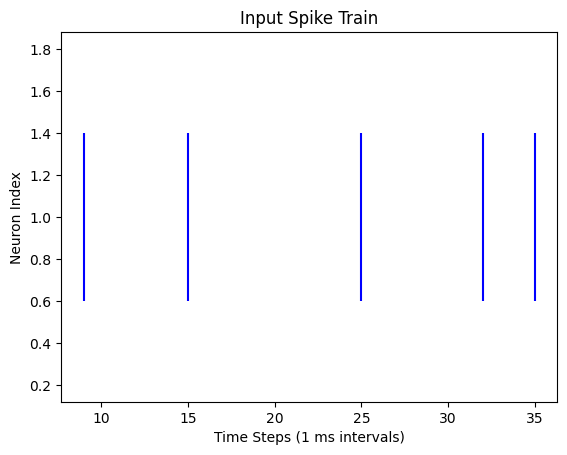

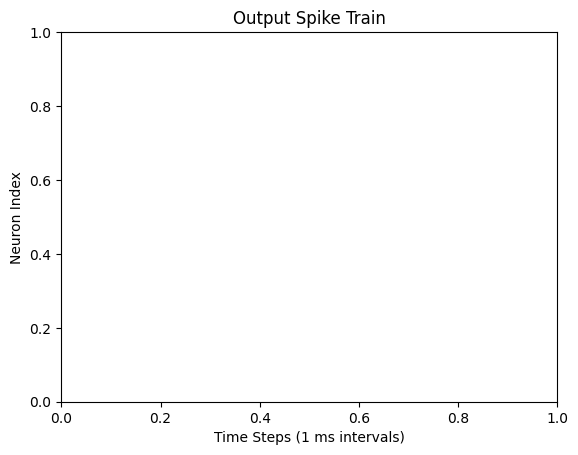

In [5]:
import random
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + 2.71828**(-x))

def generate_binary_spike_train(num_steps, firing_rate):
    spike_train = [random.random() < firing_rate for _ in range(num_steps)]
    return [int(spike) for spike in spike_train]

def simulate_neuron(inputs, weights, threshold):
    activation = sigmoid(sum(input_val * weight for input_val, weight in zip(inputs, weights)))
    return int(activation >= threshold)

def raster_plot(spike_train, title, color='black'):
    num_steps = len(spike_train)
    spike_indices = [i for i, spike in enumerate(spike_train) if spike]
    plt.eventplot([spike_indices], colors=color, linelengths=0.8)
    plt.title(title)
    plt.xlabel('Time Steps (1 ms intervals)')
    plt.ylabel('Neuron Index')
    plt.show()

# Define neural network parameters
input_size = 4
output_size = 1
threshold = 0.65

# Generate random weights for the neural network
input_weights = [-random.random() for _ in range(input_size)]  # Adjusted for inhibitory inputs
output_weights = [random.random() for _ in range(output_size)]

# Generate input spike train
input_spike_train = generate_binary_spike_train(num_steps=50, firing_rate=0.2)

# Initialize output spike train
output_spike_train = [0] * 50

# Simulate the neural network
for step in range(50):
    inputs = [input_spike_train[step]]
    output_spike_train[step] = simulate_neuron(inputs, output_weights, threshold)

# Generate raster plots for input and output spikes
raster_plot(input_spike_train, 'Input Spike Train', color='blue')
raster_plot(output_spike_train, 'Output Spike Train', color='red')


### Topic Discussion: Coincidence Detection for Sound

Coincidence detection is an auditory mechanism used for sound localization which helps us identify the source and direction of a sound based on the auditory input we receive from one ear. The sound will reach one ear slightly before the other and the neurons found in the auditory brainstem (of birds and mammals) detect this coincidence between the two ears and it uses this time difference to localize the sound. Acoustical scientist and former psychologist, Lloyd A. Jeffress suggested that “the brain transforms information about the relative time of arrival of a sound at the two ears into a ‘place code’ - a map of auditory space” and stated that the neural pathways taken to reach the neurons that receive the sound input are considered to be “delay lines” (McAlpine, 2005). Any sound that is presented straight ahead will register in both ears simultaneously.

Just as many others, this neuronal pathway begins with a sensory input (sound waves) and from there it travels through various structures within the brainstem before finally prioritizing its focus on the superior olivary complex. The superior olivary complex (SOC) are a cluster of nuclei that are located in the pons, a section of the brainstem that is sandwiched between the midbrain and medulla oblongata, and are responsible for processing binaural cues in the aid of overall sound perception. It is a major contributor of the ascending auditory pathway and is the primary source of measurement in the time difference in auditory input between both ears during the process of sound localization. As an integration center, it is also involved in cerebellar motor coordination and learning which contributes to the direction of sound during localization. 

An example of this would be when you are driving and suddenly hear an emergency vehicle in the distance, the ear that is closest to it will hear this prior to the opposing ear and this becomes more noticeable as the vehicle grows closer to where you’re located. The sound waves from the sirens are collected and funneled into the auditory canal, ultimately reaching the eardrum, and then these vibrations are converted into neural signals. These signals travel to the cochlea along the auditory nerve until they reach the cochlear nuclei within the brainstem where auditory information processing begins. SOC receives the sound input from both ears and registers the time differences between the signals from the right and left ear and uses this information to encode the binaural cues to converge into the ascending auditory pathway. From there, the processed information is sent to the auditory cortex (passing through the thalamus relay center) where highly specialized processing is completed in order for the brain to analyze the spatial localization of the emergency vehicle. 


### CAT FUN FACT

“Did you know that cats have a special reflective layer behind their retinas called the “tapetum lucidum”? It boosts their night vision and enhances their ability to see in low light conditions by reflecting light that passes through the retina back into their eyes. This is partly why cats are able to navigate and hunt effectively in low-light environments.”

https://carnegiemnh.org/meowfest-why-do-cat-eyes-glow-in-the-dark/


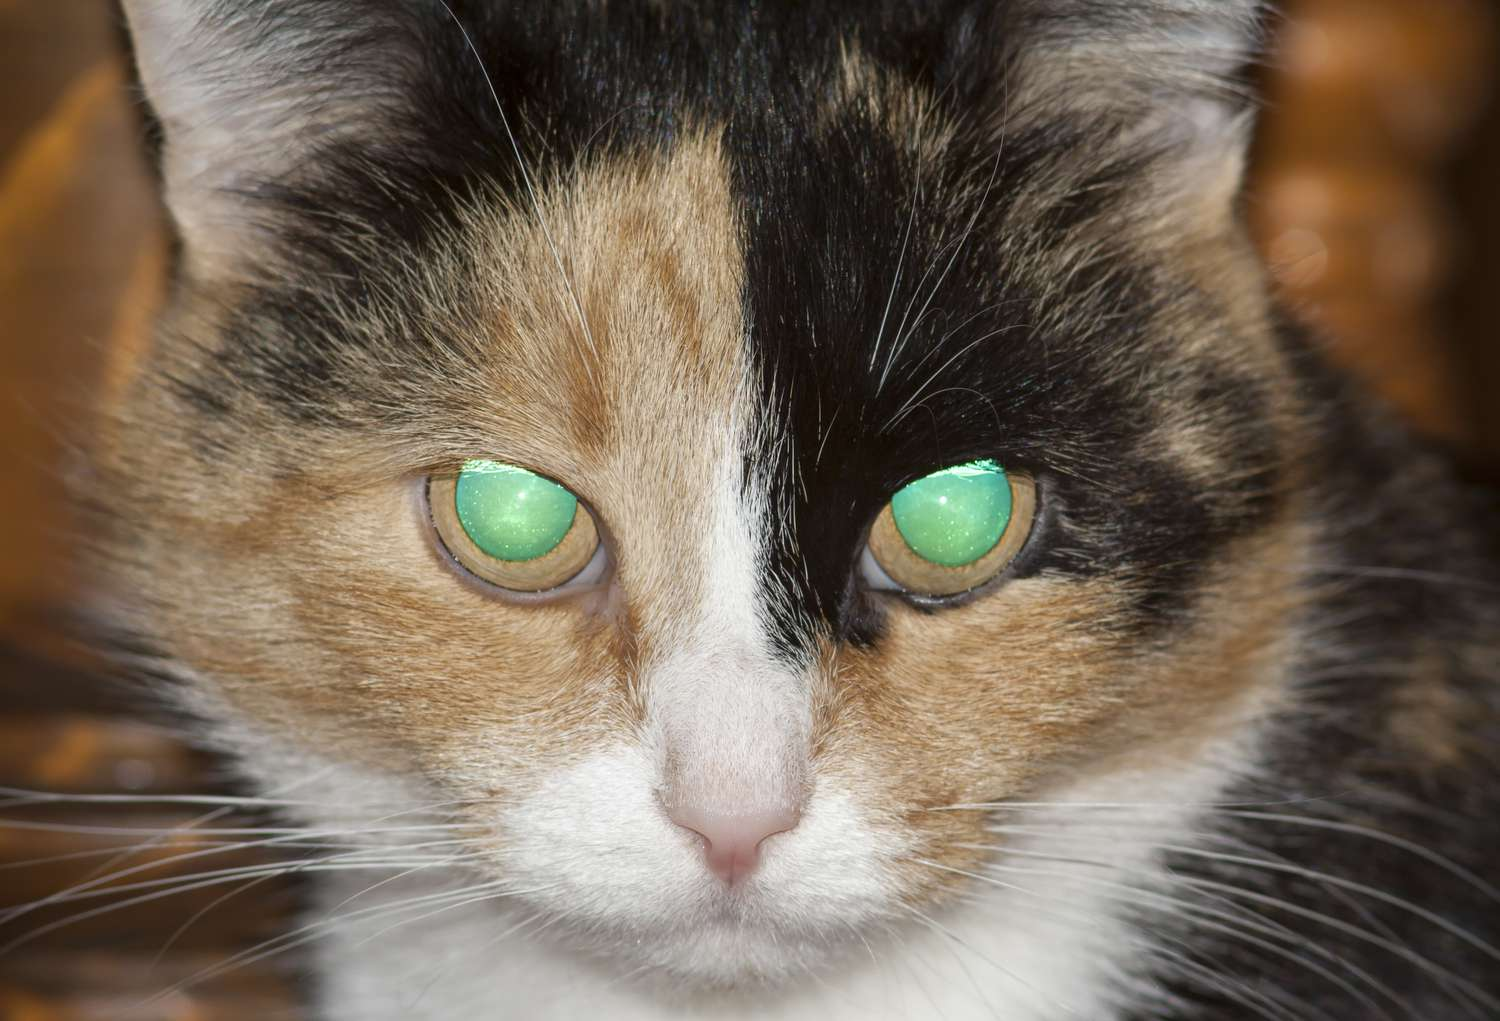

“Cats have a small organ called the Jacobson's organ or the vomeronasal organ located on the roof of their mouth. This organ allows them to detect pheromones, which play a crucial role in communication between cats.”

https://catbehaviorassociates.com/what-is-the-vomeronasal-organ/

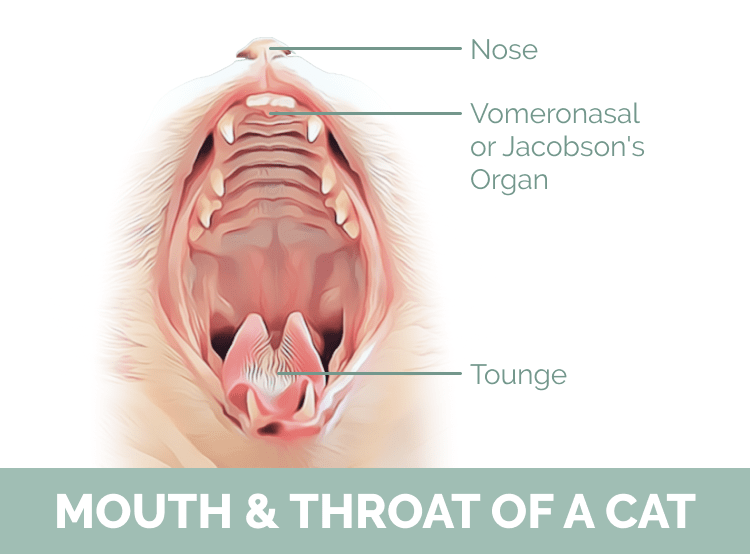